# Activity target
Se declaran las librerías generales

In [2]:
from importlib import reload
from lib.main_func_p1 import path

import pandas as pd
import numpy as np

## Parte 1. Resumen de targets


In [3]:
resumen_target = pd.read_excel('data/5_Activity_type_summary.xlsx', index_col=0)
resumen_target

C:\Users\caramirezs\anaconda3\envs\cramirez_ML\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,target_type,pref_name,organism,# Total ligands,# Active ligands,# Intermediate ligands,# Inactive ligands
accession,,,,,,,
P00533,SINGLE PROTEIN,Epidermal growth factor receptor erbB1,Homo sapiens,8808.0,2344.0,1639.0,4825.0
P56817,SINGLE PROTEIN,Beta-secretase 1,Homo sapiens,7816.0,5450.0,1393.0,973.0
P42336,SINGLE PROTEIN,PI3-kinase p110-alpha subunit,Homo sapiens,6316.0,1655.0,1824.0,2837.0
P22303,SINGLE PROTEIN,Acetylcholinesterase,Homo sapiens,5664.0,2450.0,1378.0,1836.0
P12931,SINGLE PROTEIN,Tyrosine-protein kinase SRC,Homo sapiens,4682.0,824.0,758.0,3100.0
P49841,SINGLE PROTEIN,Glycogen synthase kinase-3 beta,Homo sapiens,4375.0,746.0,886.0,2743.0
P27338,SINGLE PROTEIN,Monoamine oxidase B,Homo sapiens,4275.0,1606.0,1119.0,1550.0
P28482,SINGLE PROTEIN,MAP kinase ERK2,Homo sapiens,4021.0,2072.0,521.0,1428.0
P06276,SINGLE PROTEIN,Butyrylcholinesterase,Homo sapiens,3438.0,1227.0,876.0,1335.0


Se escoge la proteina (uniprot_ID) y el grupo al que pertenece

In [4]:
uniprot_data = ['P49841', 'kinase']
# uniprot_data = ['P22303', 'Non-IDG Family Targets']
uniprot_id = uniprot_data[0]
path_file = path(uniprot_id)

Se declaran las librerias y dependencias

In [5]:
import lib.main_func_p1
reload(lib.main_func_p1)
from lib.main_func_p1 import get_info_target

In [7]:
try:
    with open(f'{path_file}_03_ligands_smiles_activity_type.csv') as f:
        print('Ya se cuenta con la información del target. No es necesario hacer este proceso')
        activity_df = pd.read_csv(f'{path_file}_03_ligands_smiles_activity_type.csv')
except FileNotFoundError:
    activity_df = get_info_target(uniprot_data)

> Recuperando ADME y aplicando la regla de los 5
>> # compuestos en data set:  4375
>> # compuestos que cumplen Lipinski's rule of five: 4103
>> # compuetos que NO cumplen Lipinski's rule of five: 272
>>> Filtrando compuestos que cumplen Lipinski's rule of five
>>> SAVED: P49841_02_ligands_smiles_ADME_lipinski.csv
------------------------------------------------------------------
>>> SAVED: P49841_03_ligands_simles_activity_type.csv
>>>>>> Resumen: total(4103)
Inactive        2536
Intermediate     839
Active           728
Name: activity_type, dtype: int64
------------------------------------------------------------------


El data set final solo tiene tres columnas: |molecule_chembl_id'| 'smiles'| 'activity_type'|
Se descartaron los compuestos que no cumplen la regla de los cinco.

In [8]:
activity_df.head()

,chembl_id_ligand,smiles,activity_type
0,CHEMBL251393,Brc1cnn2c(NCc3cccnc3)cc(C3CCCCC3)nc12,Active
1,CHEMBL489435,C#CCOc1ccc2c(C3=C(c4cn(C)c5ccc(Br)cc45)C(=O)NC...,Active
2,CHEMBL308454,C(=N/Nc1ncnc2c1cnn2-c1ccncc1)\c1ccncc1,Active
3,CHEMBL549668,CC(=O)N(C)c1ccc(Sc2nc(Nc3cc(C)[nH]n3)c3ccccc3n...,Active
4,CHEMBL599224,CC(=O)N1CCC(Nc2ncc3c(n2)-c2c(c(C(N)=O)nn2C)CC3...,Active


In [35]:
# Comprobar que no hay smiles duplicados en el conjunto (todo debe dar false)
activity_df.duplicated(subset=['smiles']).value_counts()

False    4103
dtype: int64

In [9]:
print(f'Total de compuestos: {len(activity_df)} (que cumplen la regla de los cinco)')
print(f'{activity_df.activity_type.value_counts()}')

Total de compuestos: 4103 (que cumplen la regla de los cinco)
Inactive        2536
Intermediate     839
Active           728
Name: activity_type, dtype: int64


## Parte 2. Análisis estadístico de los datos

Se declaran las librerias y dependencias
Se carga los data set para no volver a ejecutar la primera parte (tarda mucho tiempo la primera vez)

In [10]:
from lib.main_func_p2 import get_properties_stats, plot_radarplot
import matplotlib.pyplot as plt
import seaborn as sns

path_file = path(uniprot_id)
ADME_df = pd.read_csv(f'{path_file}_02_ligands_smiles_ADME_lipinski.csv')
print('Archivo ADME_df cargado')
activity_df = pd.read_csv(f'{path_file}_03_ligands_smiles_activity_type.csv')
print('Archivo SMILES + tipo_actividad cargado')

Archivo ADME_df cargado
Archivo SMILES + tipo_actividad cargado


In [11]:
ADME_df.head()

,chembl_id_ligand,smiles,MW,HBA,HBD,LogP,activity_type
0,CHEMBL251393,Brc1cnn2c(NCc3cccnc3)cc(C3CCCCC3)nc12,385.090208,5,1,4.54660,Active
1,CHEMBL489435,C#CCOc1ccc2c(C3=C(c4cn(C)c5ccc(Br)cc45)C(=O)NC...,474.021519,5,1,4.26620,Active
2,CHEMBL308454,C(=N/Nc1ncnc2c1cnn2-c1ccncc1)\c1ccncc1,316.118492,8,1,2.05150,Active
3,CHEMBL549668,CC(=O)N(C)c1ccc(Sc2nc(Nc3cc(C)[nH]n3)c3ccccc3n...,404.141930,6,2,4.53882,Active
4,CHEMBL599224,CC(=O)N1CCC(Nc2ncc3c(n2)-c2c(c(C(N)=O)nn2C)CC3...,369.191323,7,2,0.49740,Active


### Estadística ADME

In [12]:
data_stats = get_properties_stats(ADME_df)
print('> Datos estadísticos de los compuestos filtrados por la regla de los cinco')
data_stats

> Datos estadísticos de los compuestos filtrados por la regla de los cinco


,mean,std
HBD,1.80,1.09
HBA,5.19,1.96
MW,366.67,78.13
LogP,3.38,1.27


> Resumen (gráfico) de las estadísticas


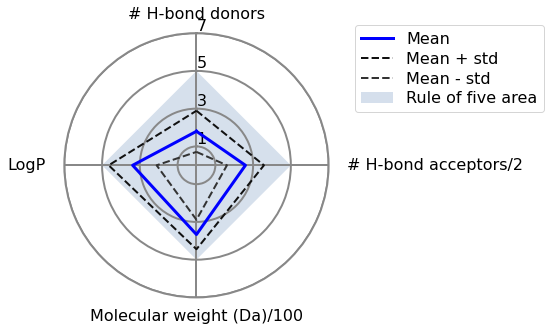

In [13]:
print('> Resumen (gráfico) de las estadísticas')
plot_radarplot(uniprot_id, data_stats)

In [14]:
ADME_filtered_df = ADME_df[ADME_df['activity_type']!='Intermediate']
print(f'Filtrado de compuestos activos / inactivos: {len(ADME_filtered_df)}')

Filtrado de compuestos activos / inactivos: 3264


<Figure size 1440x1440 with 0 Axes>

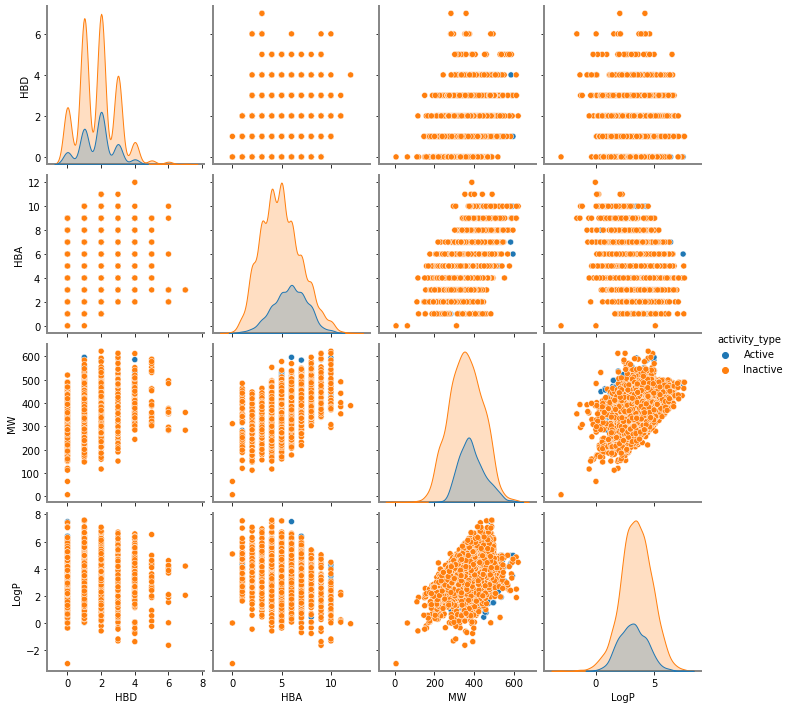

In [15]:

fig = plt.figure(figsize=(20, 20))
ax = sns.pairplot(data=ADME_filtered_df, vars=['HBD', 'HBA', 'MW', 'LogP'], hue='activity_type')
plt.show()

plt.savefig(f'{path_file}_AllinOne.png', bbox_inches='tight')
plt.close()

### Estadísticas tipo de actividad

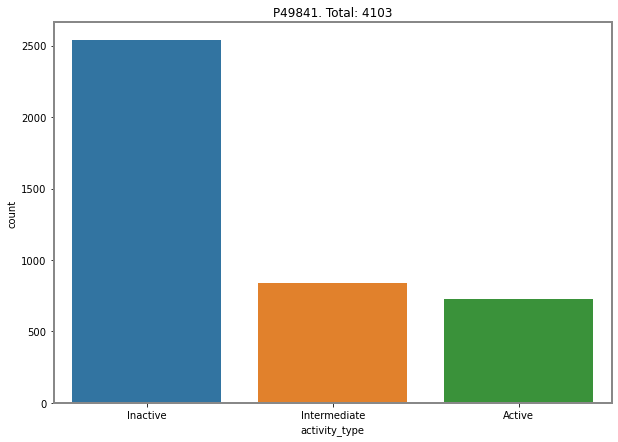

In [16]:
fig = plt.figure()
fig.set_size_inches(10,7)
ax = sns.countplot(x='activity_type', data=ADME_df, order=['Inactive', 'Intermediate', 'Active'])
ax.set_title(f'{uniprot_id}. Total: {len(ADME_df)}')
plt.show()

plt.savefig(f'{path_file}_activity_type.png', bbox_inches='tight')
plt.close()

## Parte 3. Descarga de los fingerprint
Se declaran las librerias y dependencias
Se carga los data set para no volver a ejecutar la primera parte (tarda mucho tiempo la primera vez)

In [20]:
import lib.main_func_p3
reload(lib.main_func_p3)
from lib.main_func_p3 import export_train_set_pickle
import pandas as pd

path_file = path(uniprot_id)
# Filtrado Activos / Inactivos
activity_filtered_df = pd.read_csv(f'{path_file}_03_ligands_smiles_activity_type.csv')
activity_filtered_df = activity_filtered_df[activity_df['activity_type'] != 'Intermediate']

A partir del SMILE se encuentra la representación vectorial de la fingerprint. Hay una gran variedad de fingerprints, la siguiente lista tiene algunas de las más comunes.
La lista completa está en `main_func_p3.py`

In [24]:
print("""
maccs                   MACCS KEys              nBits = 167
morgan2_c               ECFP4                   nBits = 1024
morgan3_c               ECFP6                   nBits = 1024
topological_torsions_b  TORSION                 nBits = 2048
rdkit5_b                RDK5                    nBits = 1024
avalon_512_b            AVALON                  nBits = 512
""")


maccs                   MACCS KEys              nBits = 167
morgan2_c               ECFP4                   nBits = 1024
morgan3_c               ECFP6                   nBits = 1024
topological_torsions_b  TORSION                 nBits = 2048
rdkit5_b                RDK5                    nBits = 1024
avalon_512_b            AVALON                  nBits = 512



In [25]:
fp_list = ['maccs', 'morgan2_c', 'morgan3_c', 'topological_torsions_b', 'rdkit5_b', 'avalon_512_b']

La siguiente función encuentra las fingerprints seleccionadas (lista fp_list) de los compuestos del data set y cambia la columna activity_type por activity, siendo 0: inactive y 1: active.
Para no volver a realizar todo el proceso anterior, se puede guardar el data set en formato `pickle` con la información de las fingerprints y la clasificación

In [26]:
try:
    with open(f'{path_file}_dataset') as f:
        print('El archivo ya está en la base. No es necesario hacer este proceso')
        fp_df = pd.read_pickle(f'{path_file}_dataset')
except FileNotFoundError:
    # Construct a molecule from a SMILES string
    fp_df = export_train_set_pickle(activity_filtered_df, fp_list)
    fp_df.to_pickle(f'{path_file}_dataset')
    print(f'>>> SAVED: {uniprot_id}_dataset, compounds: {len(fp_df)}')

>>> SAVED: P49841_dataset, compounds: 3264


Este es un ejemplo del conjunto de entrenamiento guardado

In [27]:
fp_df.head()

,chembl_id_ligand,maccs,morgan2_c,morgan3_c,topological_torsions_b,rdkit5_b,avalon_512_b,activity
0,CHEMBL251393,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...","[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, ...",1.0
1,CHEMBL489435,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, ...",1.0
2,CHEMBL308454,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, ...","[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, ...",1.0
3,CHEMBL549668,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, ...","[1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, ...",1.0
4,CHEMBL599224,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, ...",1.0


## Parte 4. Módelo de clasificación Random Forest Classification
Se declaran las librerias y dependencias
Se descarga el archivo con la información de la fingerprints y la clasificación

In [36]:
# sklearn:
from sklearn.ensemble import RandomForestClassifier
# save the models
import pickle

In [37]:
import lib.main_func_p4_CLF_models
reload(lib.main_func_p4_CLF_models)
from lib.main_func_p4_CLF_models import create_param_grid, model_clf_fp, plot_ROC_curve, model_clf
import pandas as pd

path_file = path(uniprot_id)
fp_df = pd.read_pickle(f'{path_file}_dataset')
fp_list = list(fp_df.columns)[1:-1] # Reload finger print list
print(f'>>> LOAD: 05_{uniprot_id}_dataset')

>>> LOAD: 05_P49841_dataset


Resumen de la clasificación de la actividad:

In [38]:
print(fp_df.activity.value_counts())
ratio = round(list(fp_df.activity.value_counts())[0] / list(fp_df.activity.value_counts())[1], 2)
print(f'Razón [{ratio}: 1]')

0.0    2536
1.0     728
Name: activity, dtype: int64
Razón [3.48: 1]


El conjunto de datos de entrenamiento está desbalanceado

Para trabajar con conjuntos desbalanceados se puede:
1. Medir diferentes métricas de desempeño
2. Remuestreo del conjunto, submuestreo de la clase dominante
3. Penalizar el modelo

### Submuestreo clase dominante

La idea es escoger aleatoriamente n muestras de la clase dominante, donde n es el número de muestras de la otra clase, de esta manera ambas categorías tendrán el mismo número de muestras

In [39]:
seed = 1
resample = 1.75

fp_df_active = fp_df[fp_df.activity == 1]
fp_df_inactive = fp_df[fp_df.activity == 0]

new_ratio = min(ratio , resample)
n_sample = round(new_ratio * min(len(fp_df_inactive), len(fp_df_active)))
if len(fp_df_active) > len(fp_df_inactive):
    fp_df_active = fp_df_active.sample(n_sample, random_state=seed)
elif len(fp_df_inactive) > len(fp_df_active):
    fp_df_inactive = fp_df_inactive.sample(n_sample, random_state=seed)
fp_df_down = pd.concat([fp_df_active, fp_df_inactive], ignore_index=True).sample(frac=1, random_state=seed)
fp_df_down.reset_index(drop=True, inplace=True)
fp_df_down.head()

,chembl_id_ligand,maccs,morgan2_c,morgan3_c,topological_torsions_b,rdkit5_b,avalon_512_b,activity
0,CHEMBL2177156,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, ...","[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, ...",1.0
1,CHEMBL2048673,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, ...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, ...",1.0
2,CHEMBL3091542,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",1.0
3,CHEMBL407958,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, ...","[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...",0.0
4,CHEMBL4483032,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, ...",1.0


In [40]:
# Renombrar dataframes para trabajar con el nuevo
fp_df_bkup = fp_df.copy()
fp_df = fp_df_down.copy()
print('# compuestos: ', len(fp_df))
print(fp_df.activity.value_counts())
ratio = round(list(fp_df.activity.value_counts())[0] / list(fp_df.activity.value_counts())[1], 2)
print(f'Razón [{ratio}: 1]')

# compuestos:  2002
0.0    1274
1.0     728
Name: activity, dtype: int64
Razón [1.75: 1]


Comparación del rendimiento del modelo Random Forest clf con las diferentes _fingerprints_. Parámetros por defecto.

In [41]:
Rf_clf = RandomForestClassifier()
n_splits = 5

df_model, results_ROC_fp = model_clf_fp(Rf_clf, fp_df, fp_list, seed=seed, n_splits=n_splits)
print(Rf_clf.get_params(),'\n-------------------------------------')
df_model

Results RandomForestClassifier: 
-------------------------------------
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 
-------------------------------------


,FINGERPRINT,AUC_train,acc_train,sen_train,spe_train,pre_train,AUC_test,acc_test,sen_test,spe_test,pre_test,f1_score,confusion_m,time
0,maccs,0.999605,0.993129,0.993127,0.993131,0.988034,0.941553,0.890274,0.794521,0.945098,0.892308,0.840580,"[[241, 14], [30, 116]]",1.551918
1,morgan2_c,1.000000,0.999375,0.998282,1.000000,1.000000,0.954016,0.905237,0.835616,0.945098,0.897059,0.865248,"[[241, 14], [24, 122]]",4.026577
2,morgan3_c,1.000000,1.000000,1.000000,1.000000,1.000000,0.945958,0.917706,0.849315,0.956863,0.918519,0.882562,"[[244, 11], [22, 124]]",4.430226
3,topological_torsions_b,1.000000,1.000000,1.000000,1.000000,1.000000,0.954714,0.907731,0.842466,0.945098,0.897810,0.869258,"[[241, 14], [23, 123]]",3.921847
4,rdkit5_b,1.000000,1.000000,1.000000,1.000000,1.000000,0.958998,0.917706,0.849315,0.956863,0.918519,0.882562,"[[244, 11], [22, 124]]",2.773929
5,avalon_512_b,0.999997,0.999375,1.000000,0.999019,0.998285,0.952431,0.915212,0.828767,0.964706,0.930769,0.876812,"[[246, 9], [25, 121]]",1.770935


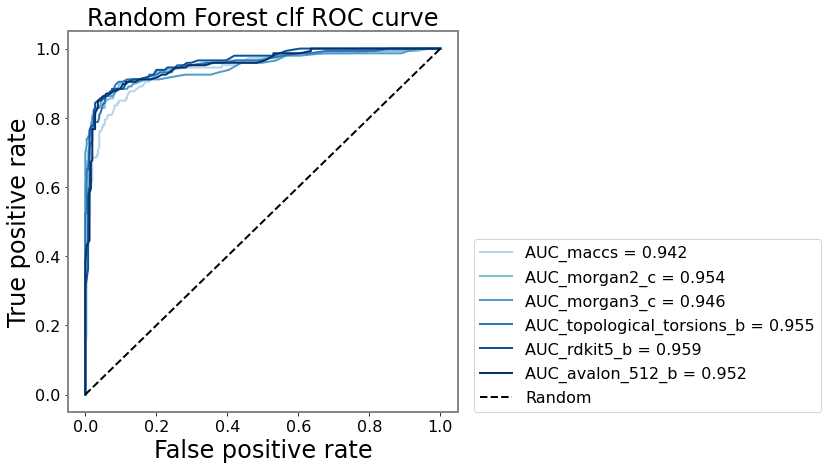

In [42]:
model_name = 'Random Forest clf'
metrics_ROC = results_ROC_fp
metrics_ROC_name = fp_list
plot_ROC_curve(metrics_ROC, metrics_ROC_name, model_name)

Es un caso de *overfiting*, ya que el AUC_train (área bajo la curva ROC del conjunto de entrenamiento) es 1.
Se puede deber a la cantidad de datos o a la cantidad de características.
Opciones:
1. Hacer el modelo más simple.
2. Ajustar los hyperparámetros
3. Reducir la dimensión de las características

Se escoge la fingerprint *maacs*, porque muestra un buen rendimiento y tiene la menos dimensión (167).
El objetivo ahora es intentar optimizar el modelo utilizando la fingerprint **maccs**

In [43]:
Rf_clf_over = RandomForestClassifier(n_jobs=-1)
seed = 1
n_splits = 5

fp_name = 'morgan2_c'
# fp_name = 'avalon_512_b'
df_model_over, results_ROC_over = model_clf(Rf_clf_over, fp_df, fp_name, uniprot_id,
                                              params_dict=None, seed=seed, n_splits=n_splits)
# print(Rf_clf_tuned.get_params())
df_model_over

Results RandomForestClassifier: 
-------------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       255
         1.0       0.90      0.84      0.87       146

    accuracy                           0.91       401
   macro avg       0.91      0.89      0.90       401
weighted avg       0.91      0.91      0.91       401



,Metric,Train,Test
0,AUC,1.0,0.954647
1,accuracy,0.999375,0.907731
2,sensitivity (recall),0.998282,0.998282
3,specificity,1.0,0.94902
4,precision,1.0,0.903704
5,f1_score,0.99914,0.868327
6,confusion_matrix,"[[1019, 0], [1, 581]]","[[242, 13], [24, 122]]"


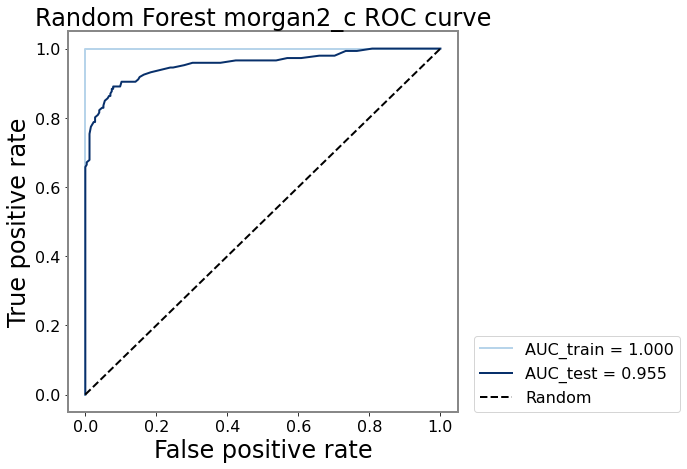

In [44]:
model_name = f'Random Forest {fp_name}'
metrics_ROC = results_ROC_fp
metrics_ROC_name = ['train', 'test']
plot_ROC_curve(results_ROC_over, metrics_ROC_name, model_name)

### Grilla de parámetros Random Forest

Para encontrar el mejor modelo se hace una búsqueda de _hyper parámetros_. Se escoge la siguiente grilla, para un total de 253400 opciones.

In [84]:
param_grid_all = {'n_estimators': np.arange(60, 220, 20),
              'min_samples_split': np.arange(2, 10, 2),
              'min_samples_leaf': np.arange(5, 30, 5),
              'max_features': ['auto', 0.6, 0.7, 0.8, 0.9, 1],
              'max_leaf_nodes': np.arange(40, 220, 20),
              'oob_score': [True, False],
              'max_samples': ['None', 0.7, 0.8, 0.9],
              'criterion': ['gini', 'entropy']}
file_name = 'params_grid_RFC.csv'
# Crear la grilla
create_param_grid(param_grid_all, 'params_grid_RFC.csv')

La búsqueda y optimización de los hyper parámetros se realiza fuera de este notebook para realizar múltiples pruebas en paralelo. El excel `results_grid_params_RFC` tiene los resultados.

### Construcción y verificación del modelo
Una vez escogidos los hypoer parámetros, se vuelve a ejecutar el modelo. Como se puede ver en las curvas ROC, se redujo el overfiting y las métricas tienen resultados positivos

In [46]:
print("""----------------------------------------------------------------------------------------------------------------------
-----------------------------------HIPER PARAMETROS-------------------------------------------------------------------
#>>> (03.23.2022): Buen desempeño, esta en el top de la mayoría de métricas. Presenta un poco de overfitting
{'n_estimators': 60, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 0.9,
'max_leaf_nodes': 180, 'oob_score': True, 'max_samples': None, 'criterion': 'gini'}

#>>> (03.23.2022): overfiting maccs - ratio:2 - n_splits:5
{'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 1.0,
'max_leaf_nodes': 80, 'oob_score': True, 'max_samples': 0.7, 'criterion': 'gini'}

# >>> (03.2.2022): overfiting maccs - ratio:2 - n_splits:5
{'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 0.8,
'max_leaf_nodes': 40, 'oob_score': True, 'max_samples': 0.8, 'criterion': 'gini'}

# >>> (03.2.2022): overfiting maccs - ratio:1.5 - n_splits:5
{'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 1.0, 'max_leaf_nodes': 180, 'oob_score': False, 'max_samples': 0.9, 'criterion': 'entropy'}

# >>> (03.2.2022): overfiting maccs - ratio:1.75 - n_splits:5
{'n_estimators': 80, 'min_samples_split': 8, 'min_samples_leaf': 15, 'max_features': 0.6, 'max_leaf_nodes': 160, 'oob_score': True, 'max_samples': nan, 'criterion': 'entropy'}
----------------------------------------------------------------------------------------------------------------------""")

----------------------------------------------------------------------------------------------------------------------
-----------------------------------HIPER PARAMETROS-------------------------------------------------------------------
#>>> (03.23.2022): Buen desempeño, esta en el top de la mayoría de métricas. Presenta un poco de overfitting
{'n_estimators': 60, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 0.9,
'max_leaf_nodes': 180, 'oob_score': True, 'max_samples': None, 'criterion': 'gini'}

#>>> (03.23.2022): overfiting maccs - ratio:2 - n_splits:5
{'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 1.0,
'max_leaf_nodes': 80, 'oob_score': True, 'max_samples': 0.7, 'criterion': 'gini'}

# >>> (03.2.2022): overfiting maccs - ratio:2 - n_splits:5
{'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 0.8,
'max_leaf_nodes': 40, 'oob_score': True, 'max_samples': 0.8, 'criterion': 'gini'}

# >>> (03.2.202

In [47]:
# >>> (03.2.2022): overfiting maccs - ratio:1.5 - n_splits:5
params_dict = {'n_estimators': 80, 'min_samples_split': 8, 'min_samples_leaf': 15, 'max_features': 0.6, 'max_leaf_nodes': 160, 'oob_score': True, 'max_samples': None, 'criterion': 'entropy'}

Rf_clf_tuned = RandomForestClassifier(n_jobs=-1)
n_splits = 5
seed = 1
df_model_tuned, results_ROC_fp = model_clf(Rf_clf_tuned, fp_df, fp_name, uniprot_id,
                                              params_dict=params_dict, seed=seed, n_splits=n_splits)
# print(Rf_clf_tuned.get_params())
df_model_tuned

Results RandomForestClassifier: 
-------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       255
         1.0       0.87      0.77      0.81       146

    accuracy                           0.87       401
   macro avg       0.87      0.85      0.86       401
weighted avg       0.87      0.87      0.87       401



,Metric,Train,Test
0,AUC,0.946555,0.928955
1,accuracy,0.861961,0.872818
2,sensitivity (recall),0.757732,0.757732
3,specificity,0.921492,0.933333
4,precision,0.846449,0.868217
5,f1_score,0.799637,0.814545
6,confusion_matrix,"[[939, 80], [141, 441]]","[[238, 17], [34, 112]]"


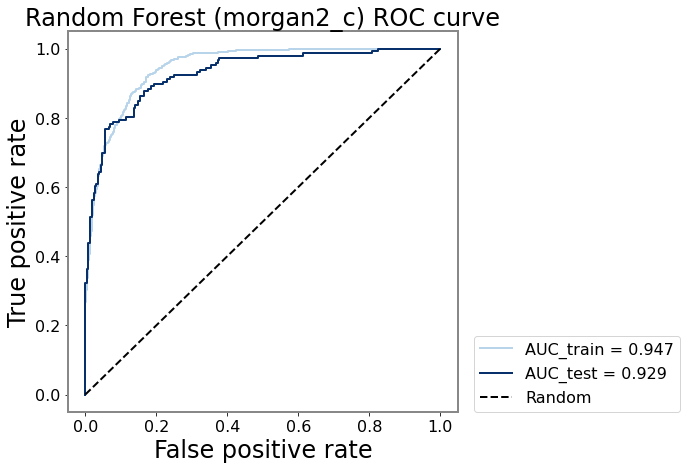

In [48]:
from lib.main_func_p4_CLF_models import plot_ROC_curve

model_name = f'Random Forest ({fp_name})'
metrics_ROC = results_ROC_fp
metrics_ROC_name = ['train', 'test']
plot_ROC_curve(metrics_ROC, metrics_ROC_name, model_name)

### Guardar y exportar el modelo
El modelo elegido se va a exportar y a utilizar con un conjunto de decoys y el conjunto de test.

In [49]:
with open(f'{path_file}_RFclf_{fp_name}_model', 'wb') as f:
    pickle.dump(Rf_clf_tuned, f)
print(f'{uniprot_id}_RFclf_{fp_name}_model SAVED')

P49841_RFclf_morgan2_c_model SAVED


## Parte 5. Uso del modelo

### Carga del modelo

In [52]:
fp_name = 'morgan2_c'
# fp_name = 'maccs'
import pickle

with open(f'{path_file}_RFclf_{fp_name}_model', 'rb') as f:
    model_RFC = pickle.load(f)
print(f'{uniprot_id}_RFclf_{fp_name}_model LOAD')
print('Hyper parámetros : \n', model_RFC.get_params())

P49841_RFclf_morgan2_c_model LOAD
Hyper parámetros : 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 0.6, 'max_leaf_nodes': 160, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 15, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 80, 'n_jobs': -1, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Carga del conjunto de prueba

OBS: El modelo no conoce los datos del conjunto de prueba
OBS: Se hace un subsample 1:1

In [53]:
with open(f'{path_file}_dataset_test', 'rb') as f:
    df_test = pickle.load(f)

# resample 1:1
df_test_active = df_test[df_test.activity == 1]
df_test_inactive = df_test[df_test.activity == 0]
n_sample = min(len(df_test_inactive), len(df_test_active))

if len(df_test_active) > len(df_test_inactive):
    df_test_active = df_test_active.sample(n_sample, random_state=seed)
elif len(df_test_inactive) > len(df_test_active):
    df_test_inactive = df_test_inactive.sample(n_sample, random_state=seed)
df_test = pd.concat([df_test_active, df_test_inactive], ignore_index=True).sample(frac=1)

df_test['type'] = 'test_inactive'
df_test.loc[df_test[df_test.activity == 1.0].index, 'type'] = 'test_active'
df_test.reset_index(drop=True, inplace=True)


df_test = df_test[['type', fp_name, 'activity']]
print(df_test.shape)
print(df_test.activity.value_counts())
df_test.head()


(292, 3)
1.0    146
0.0    146
Name: activity, dtype: int64


,type,morgan2_c,activity
0,test_active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
1,test_active,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
2,test_active,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
3,test_active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
4,test_inactive,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0


### Carga y preparación de los decoys
El archivo {uniprot_id}_decoys_final.ism contiene la lista de decoys de la proteina.
Se carga el archivo y se convierte en un data set, por ahora solo contiene el SMILE

In [54]:
df_decoys = pd.DataFrame(columns=['smiles'])
list_d = list()
with open(f'{path_file}_decoys_final.ism', 'rb') as f:
    decoys_line = f.readlines()
    for line in decoys_line:
        line = line.decode('UTF-8').split()
        list_d.append(line)
df_decoys = pd.DataFrame(list_d, columns=['smiles', 'id'])

print(df_decoys.shape)
# Escoger una cantidad igual al conjunto de prueba
df_decoys = df_decoys.sample(int(len(df_test)/2), ignore_index=True, random_state=seed)
print(len(df_decoys))
df_decoys.head()

(35850, 2)
146


,smiles,id
0,c1cc(ccc1C[NH+]2CCC(CC2)C(=O)N/N=C/c3ccc(cc3)[...,C08780793
1,c1cc2c(cc1Cl)oc(=O)n2CCC(=O)N3CC[NH+](CC3)Cc4c...,C09910230
2,CC[C@]1(C(=O)N(C(=O)N1)CC(=O)N2c3ccccc3CC[C@H]...,C22059638
3,CCCNC(=O)c1c2c(sc1NC(=O)C[C@H]3C(=O)Nc4ccccc4O...,C40801252
4,c1ccc2c(c1)cccc2N3C(=O)/C(=C/c4ccc(o4)c5ccc(cc...,C02138424


Ahora hay que encontrar la fingerprint a partir del SMILE.

In [55]:
from lib.main_func_p3 import calculate_fp

def calculate_onefp(df, fp_name):
    from rdkit import Chem
    df['mol'] = df.smiles.map(lambda smile: Chem.MolFromSmiles(smile))
    df[fp_name] = df.mol.apply(calculate_fp, args=[fp_name])

calculate_onefp(df_decoys, fp_name)
df_decoys.drop_duplicates(subset=['smiles'], inplace=True)
df_decoys.reset_index(inplace=True, drop=True)
df_decoys = df_decoys.drop(['mol'], axis=1)
df_decoys = df_decoys.drop(['smiles'], axis=1)
df_decoys['type'] = 'decoy'
df_decoys = df_decoys[['type', fp_name]]
print(df_decoys.shape)
df_decoys.head()

(146, 2)


,type,morgan2_c
0,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,decoy,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ..."
4,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Predicciones

In [56]:
x_decoy = df_decoys[fp_name].tolist()
pred_decoy = model_RFC.predict(x_decoy)
prediction_prob = model_RFC.predict_proba(x_decoy)[:,1]
prediction_prob = np.array(prediction_prob)
df_decoys['prediction'] = pred_decoy
df_decoys['prediction_prob'] = prediction_prob
df_decoys.head()

,type,morgan2_c,prediction,prediction_prob
0,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.296921
1,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.0,0.327504
2,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.062777
3,decoy,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...",0.0,0.181875
4,decoy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.350815


In [57]:
df_decoys.prediction.value_counts()

0.0    146
Name: prediction, dtype: int64

In [58]:
x_test = df_test[fp_name].tolist()
pred_test = model_RFC.predict(x_test)
prediction_prob_test = model_RFC.predict_proba(x_test)[:,1]
prediction_prob_test = np.array(prediction_prob_test)
df_test['prediction'] = pred_test
df_test['prediction_prob'] = prediction_prob_test
df_test.head()

,type,morgan2_c,activity,prediction,prediction_prob
0,test_active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,1.0,0.733882
1,test_active,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,1.0,0.759564
2,test_active,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,1.0,0.836732
3,test_active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,1.0,0.556677
4,test_inactive,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.043383


              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86       146
         1.0       0.91      0.77      0.83       146

    accuracy                           0.85       292
   macro avg       0.85      0.85      0.84       292
weighted avg       0.85      0.85      0.84       292



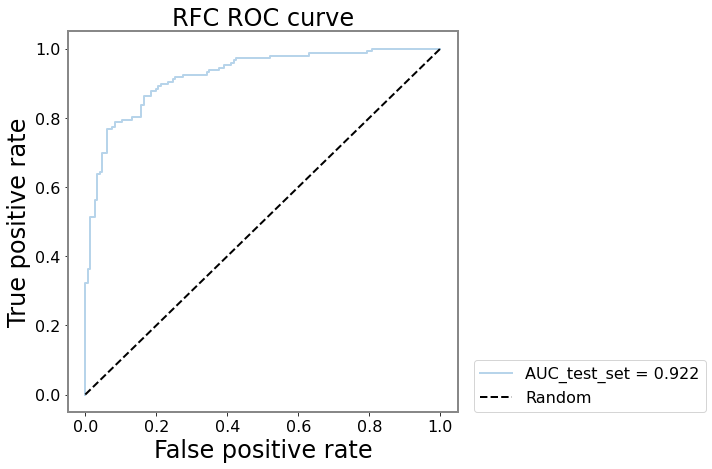

In [59]:
from lib.main_func_p4_CLF_models import plot_ROC_curve
from sklearn.metrics import roc_curve, auc, classification_report
fpr_test, tpr_test, _ = roc_curve(df_test['activity'].tolist(), prediction_prob_test)
auc_score_test = auc(fpr_test, tpr_test)
metrics_ROC = (fpr_test, tpr_test, auc_score_test)
print(classification_report(df_test['activity'].tolist(), pred_test))
plot_ROC_curve([metrics_ROC], ['test_set'], 'RFC')

In [60]:
df = pd.concat([df_test.drop(['activity'], axis=1), df_decoys], ignore_index=True)

print(df.type.value_counts())
df.head()

test_active      146
test_inactive    146
decoy            146
Name: type, dtype: int64


,type,morgan2_c,prediction,prediction_prob
0,test_active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0.733882
1,test_active,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0.759564
2,test_active,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0.836732
3,test_active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0.556677
4,test_inactive,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.043383


<Figure size 720x720 with 0 Axes>

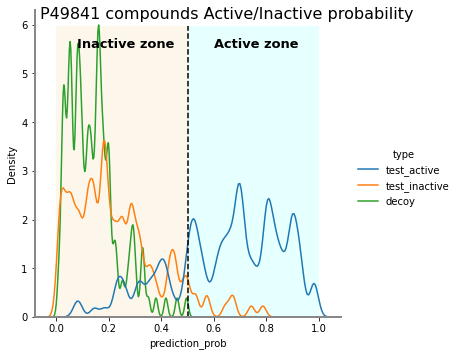

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(10,10)
ax = sns.displot(data=df, x='prediction_prob', hue="type", kind="kde", bw_adjust=.2, common_norm=False, hue_order=['test_active', 'test_inactive', 'decoy'])

plt.axvline(x=0.5, ymax=0.95, color='k', linestyle='--')
plt.axvspan(0, 0.5, ymax=0.95, facecolor='oldlace', alpha=0.8, zorder=-100)
plt.axvspan(0.5, 1, ymax=0.95, facecolor='lightcyan', alpha=0.8, zorder=-100)

plt.text(0.08, 0.88* plt.gca().get_ylim()[1], 'Inactive zone', fontsize=13, fontdict={"weight": "bold"})
plt.text(0.6, 0.88* plt.gca().get_ylim()[1], 'Active zone', fontsize=13, fontdict={"weight": "bold"})
plt.suptitle(f'{uniprot_id} compounds Active/Inactive probability',
                  fontsize=16, fontdict={"weight": "bold"})
plt.savefig(f'{path_file}_compounds_prob.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# https://imbalanced-learn.org/stable/
# calibration curves machine learning

# ratio